In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_10131363.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_10304478.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_1054527.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_10590091.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_1109992.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_11296953.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_12000629.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_12008383.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_12191716.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\ang

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [3]:
train_dir = 'C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/train'
test_dir = 'C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test'

In [4]:
num_train_folders = len([folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))])
num_test_folders = len([folder for folder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, folder))])

print(f"Number of folders (classes) in the train directory: {num_train_folders}")
print(f"Number of folders (classes) in the test directory: {num_test_folders}")

Number of folders (classes) in the train directory: 7
Number of folders (classes) in the test directory: 7


In [5]:
def get_subfolders_and_image_counts(directory):
    subfolders = {}
    for subdir, dirs, files in os.walk(directory):
        if dirs:
            for folder in dirs:
                folder_path = os.path.join(subdir, folder)
                num_images = len([file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
                subfolders[folder] = num_images
    return subfolders

train_subfolders = get_subfolders_and_image_counts(train_dir)
test_subfolders = get_subfolders_and_image_counts(test_dir)

In [6]:
print("Training Subfolders and Image Counts:")
for folder, count in train_subfolders.items():
    print(f"{folder}: {count} images")

print("\nTest Subfolders and Image Counts:")
for folder, count in test_subfolders.items():
    print(f"{folder}: {count} images")

Training Subfolders and Image Counts:
angry: 3995 images
disgust: 436 images
fear: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprise: 3171 images

Test Subfolders and Image Counts:
angry: 958 images
disgust: 111 images
fear: 1024 images
happy: 1774 images
neutral: 1233 images
sad: 1247 images
surprise: 831 images


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = {
    'Category': ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] * 2,
    'Count': [3995, 436, 4097, 7215, 4965, 4830, 3171, 958, 111, 1024, 1774, 1233, 1247, 831],
    'Dataset': ['Training'] * 7 + ['Test'] * 7
}

df = pd.DataFrame(data)

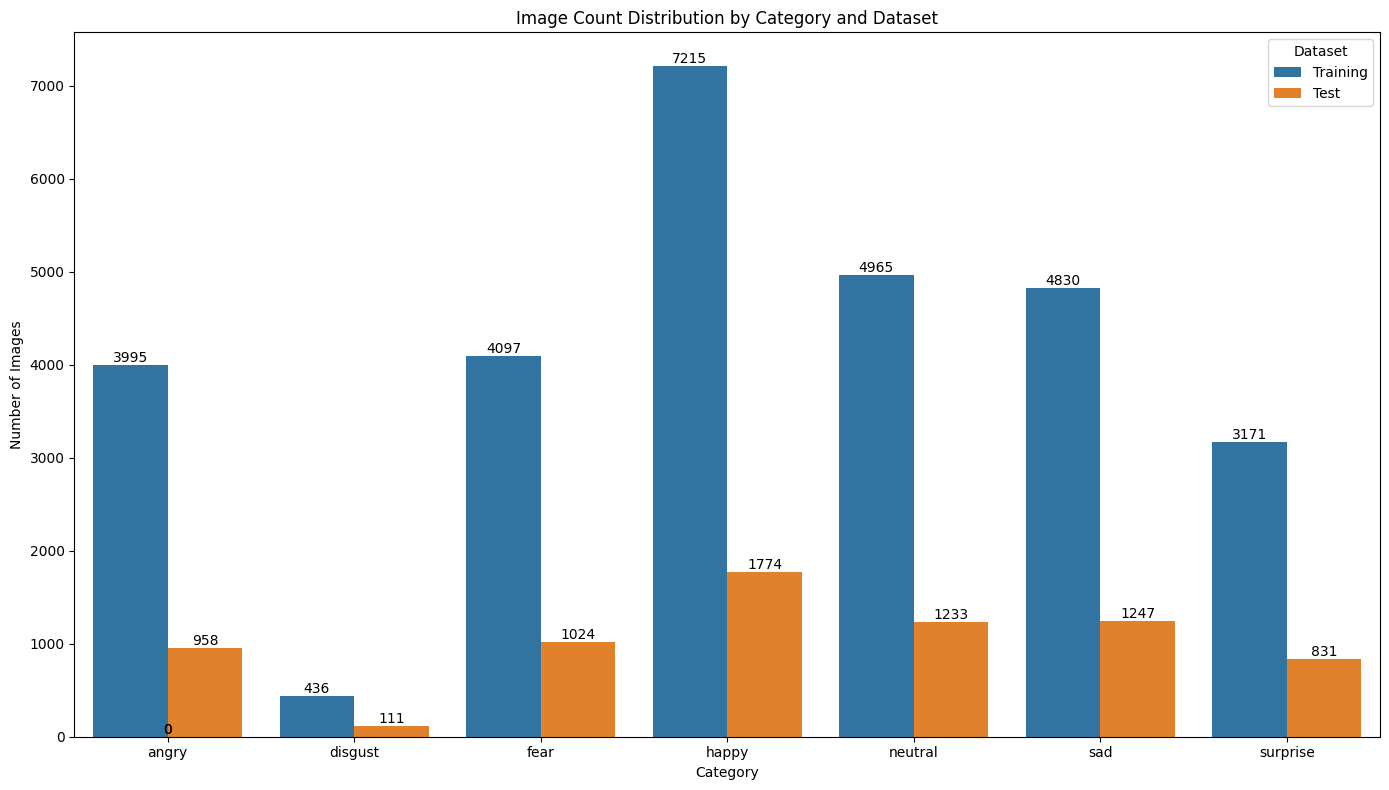

In [9]:
plt.figure(figsize=(14, 8))

ax = sns.barplot(x='Category', y='Count', hue='Dataset', data=df)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='bottom', fontsize=10)

plt.title('Image Count Distribution by Category and Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.legend(title='Dataset')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
train_counts = {
    'Category': ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
    'Count': [3995, 436, 4097, 7215, 4965, 4830, 3171]
}

test_counts = {
    'Category': ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
    'Count': [958, 111, 1024, 1774, 1233, 1247, 831]
}

df_train = pd.DataFrame(train_counts)
df_test = pd.DataFrame(test_counts)

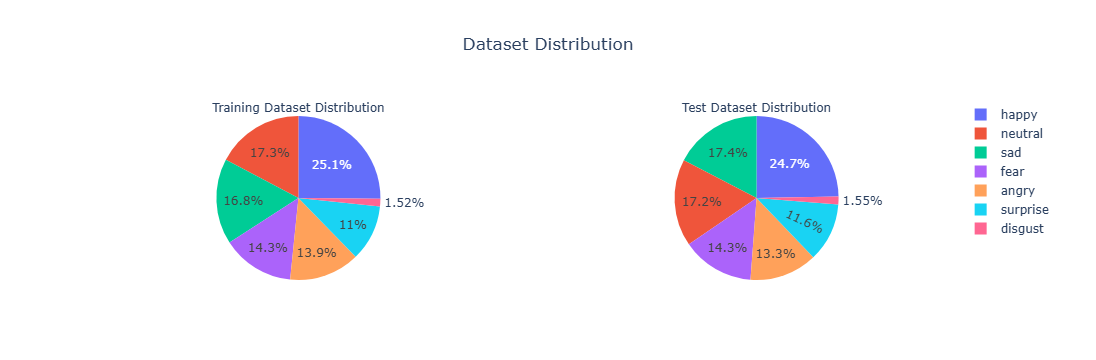

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])

fig.add_trace(go.Pie(
    labels=df_train['Category'],
    values=df_train['Count'],
    name='Training Dataset',
    hoverinfo='label+percent',
    title='Training Dataset Distribution'
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=df_test['Category'],
    values=df_test['Count'],
    name='Test Dataset',
    hoverinfo='label+percent',
    title='Test Dataset Distribution'
), row=1, col=2)

fig.update_layout(title_text='Dataset Distribution', title_x=0.5)

fig.show()

In [12]:
total_train = df_train['Count'].sum()
total_test = df_test['Count'].sum()

In [13]:
df_train['Percentage'] = (df_train['Count'] / total_train) * 100
df_test['Percentage'] = (df_test['Count'] / total_test) * 100

print("Training Dataset Percentages:")
for _, row in df_train.iterrows():
    print(f"{row['Category'].capitalize()}: {row['Percentage']:.2f}%")

print("\nTest Dataset Percentages:")
for _, row in df_test.iterrows():
    print(f"{row['Category'].capitalize()}: {row['Percentage']:.2f}%")

Training Dataset Percentages:
Angry: 13.92%
Disgust: 1.52%
Fear: 14.27%
Happy: 25.13%
Neutral: 17.29%
Sad: 16.82%
Surprise: 11.05%

Test Dataset Percentages:
Angry: 13.35%
Disgust: 1.55%
Fear: 14.27%
Happy: 24.71%
Neutral: 17.18%
Sad: 17.37%
Surprise: 11.58%


In [14]:
import cv2

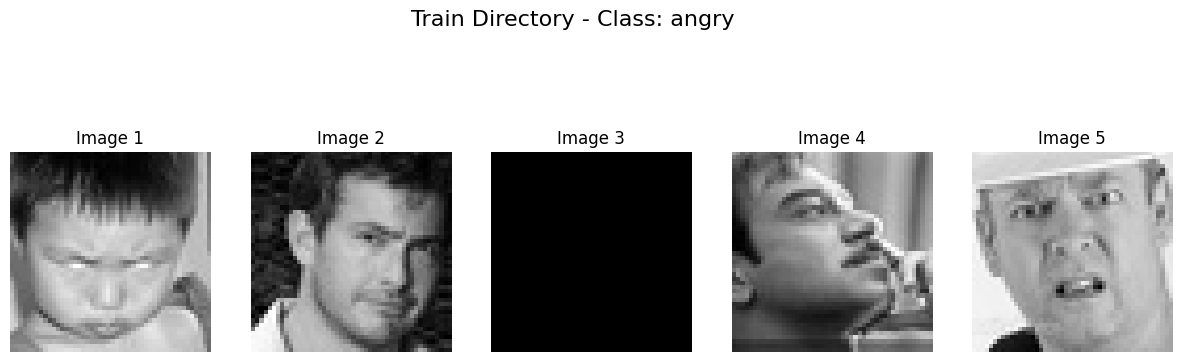

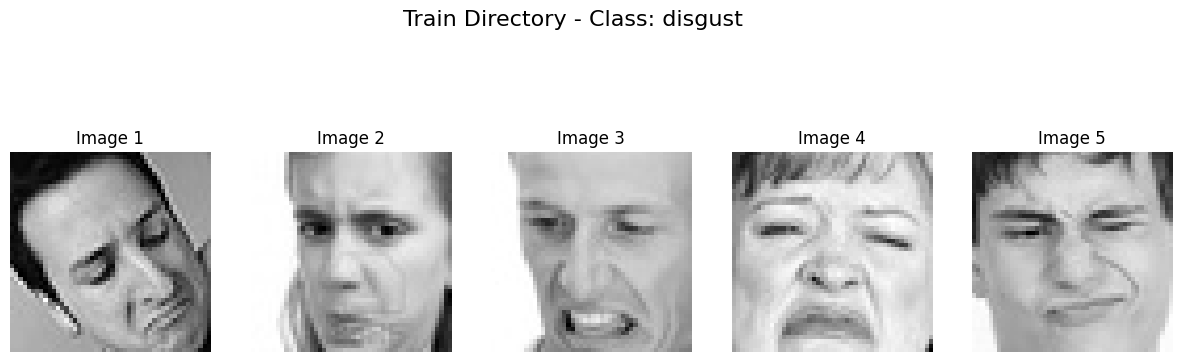

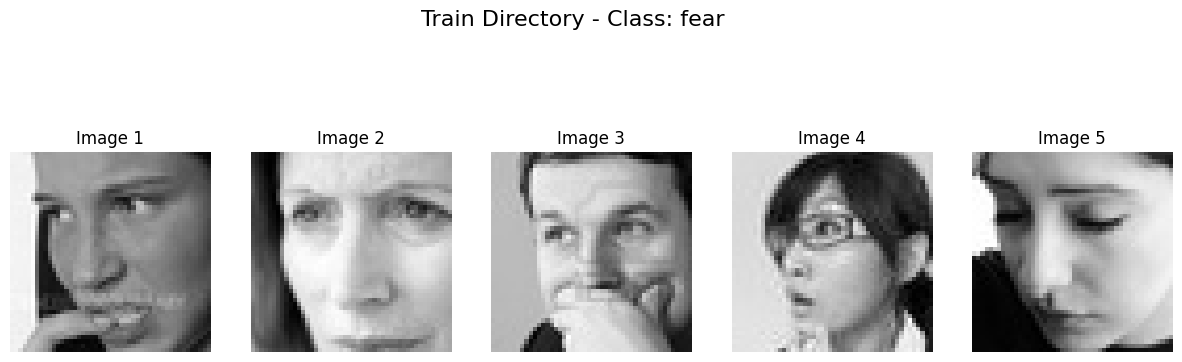

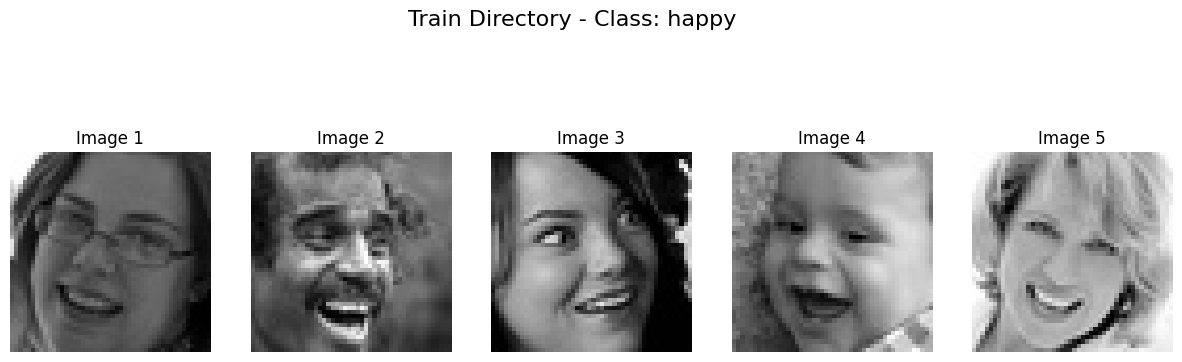

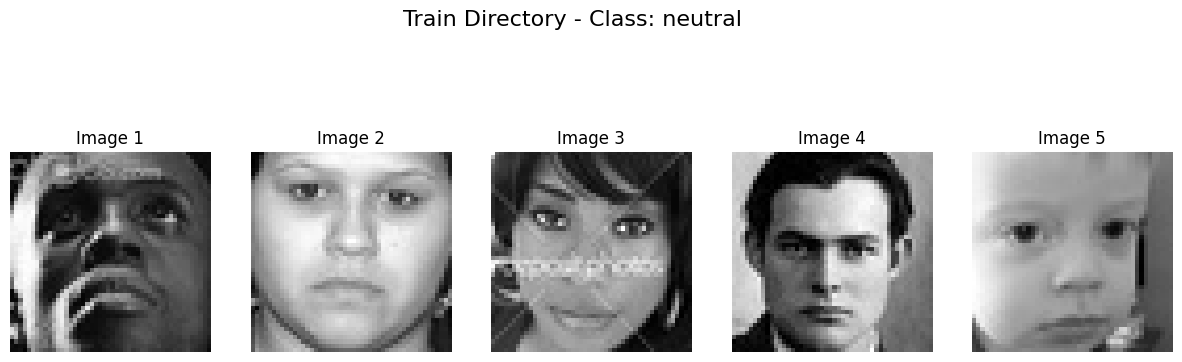

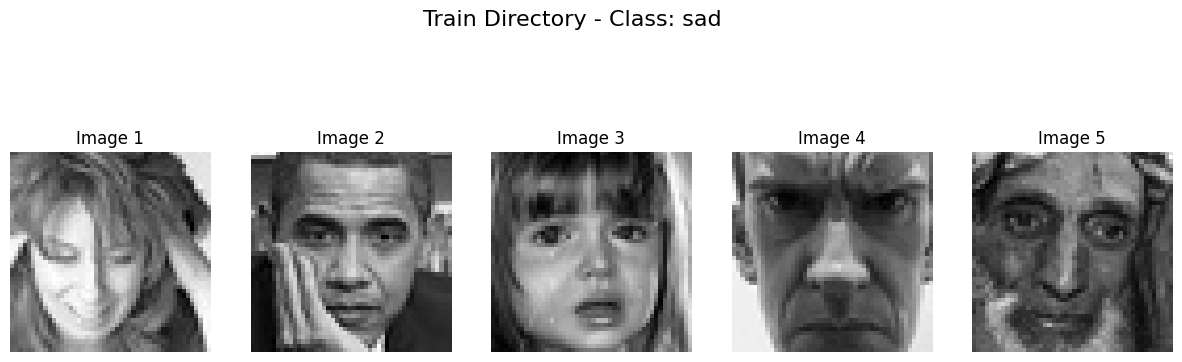

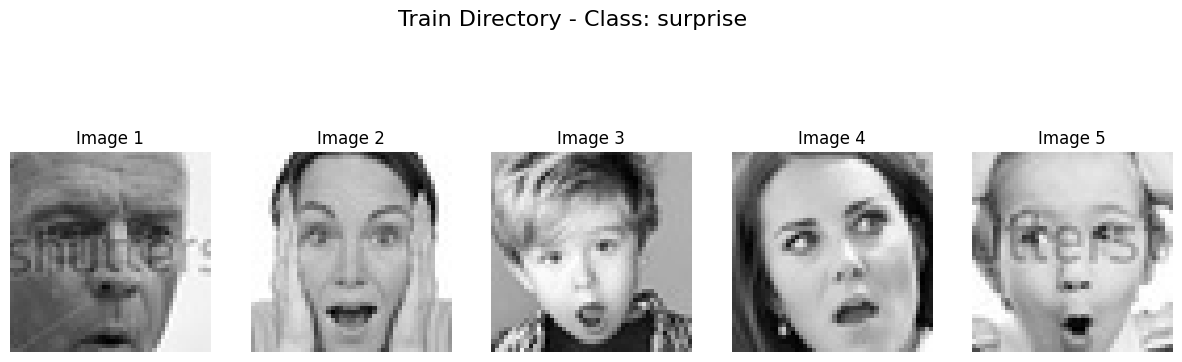

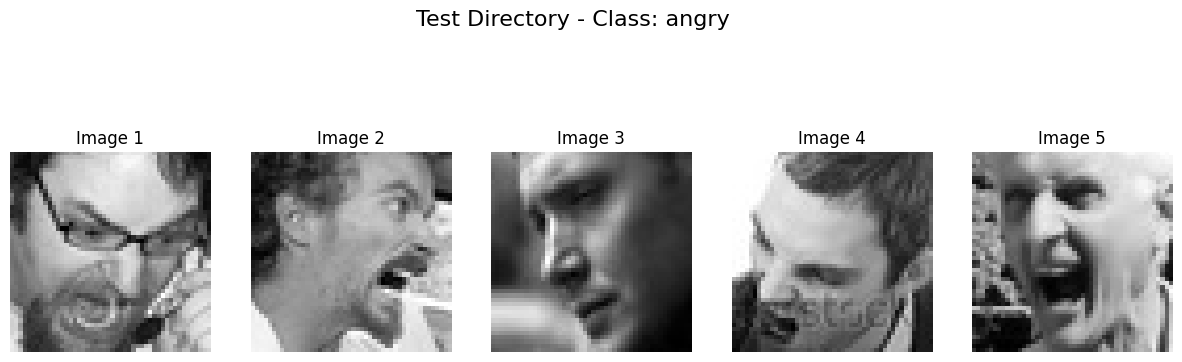

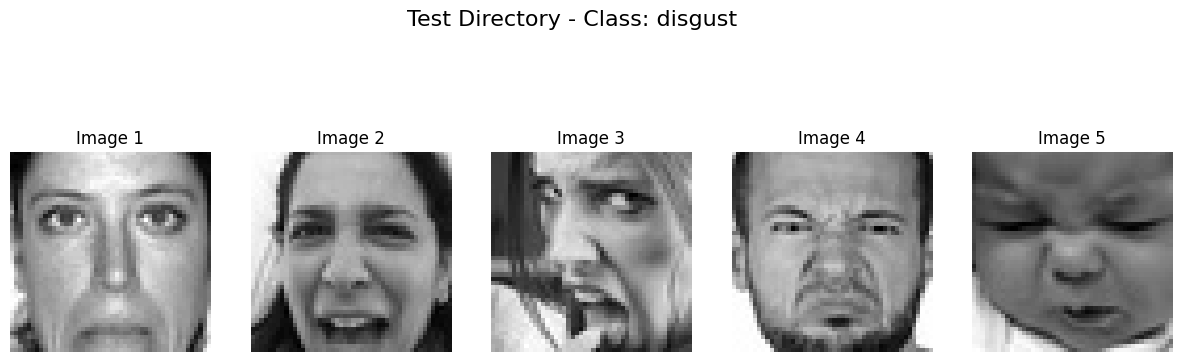

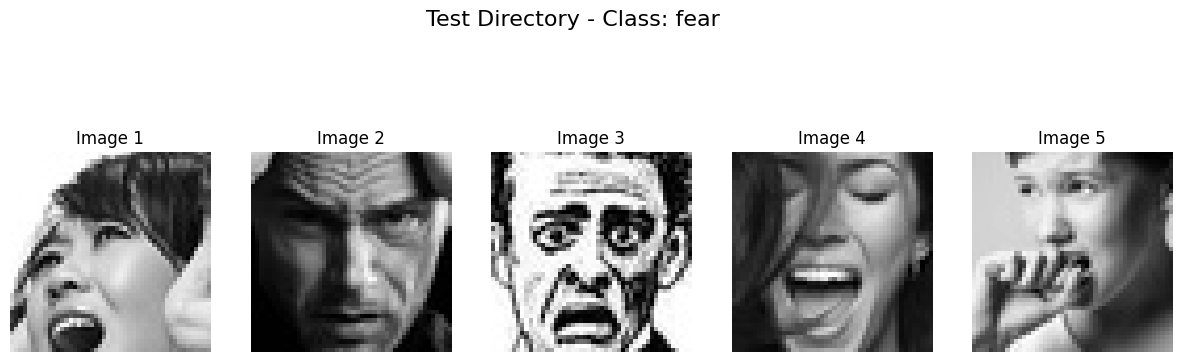

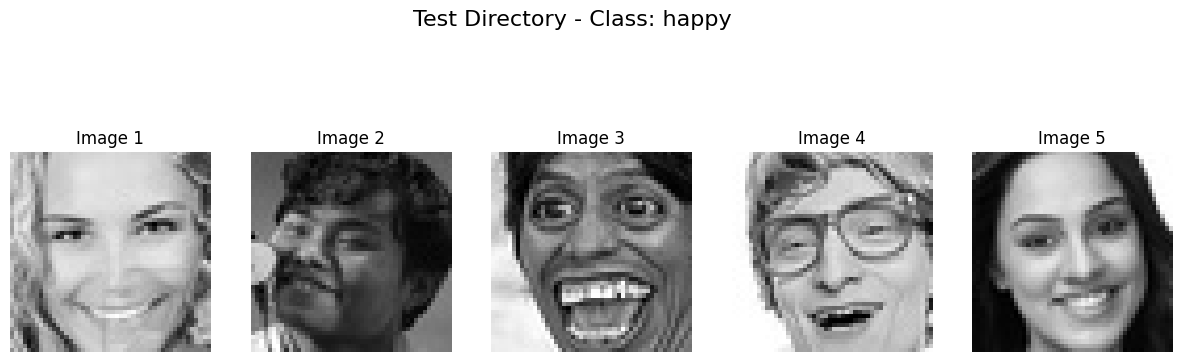

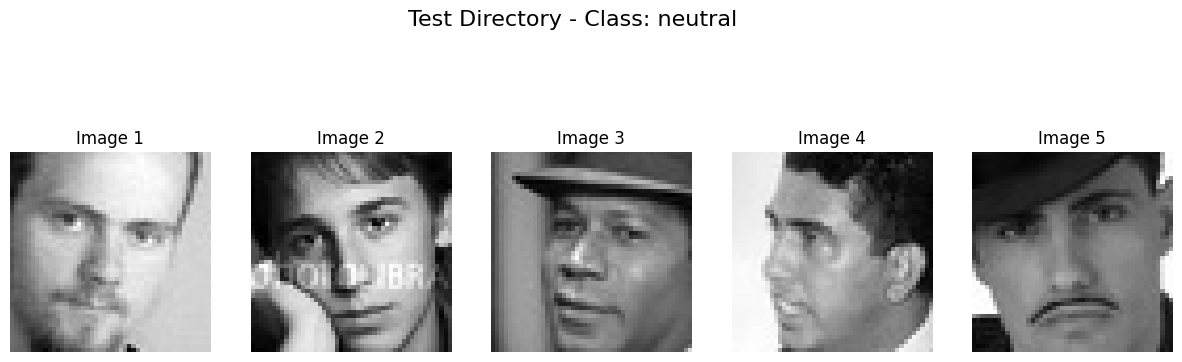

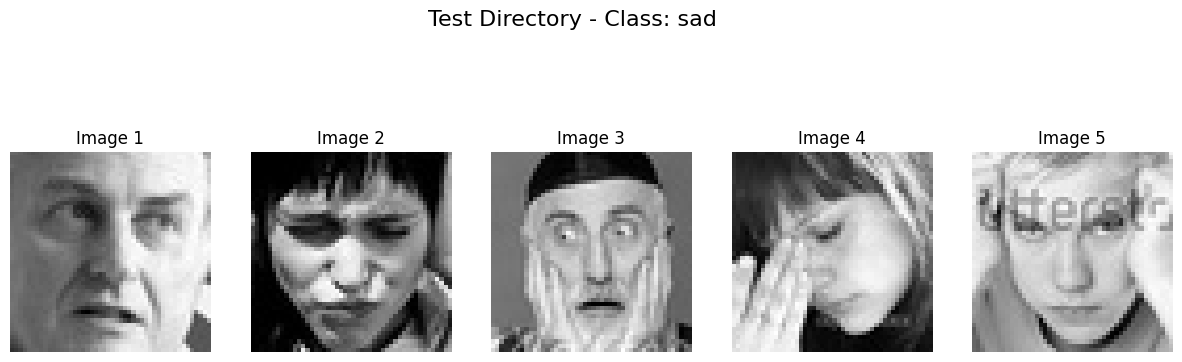

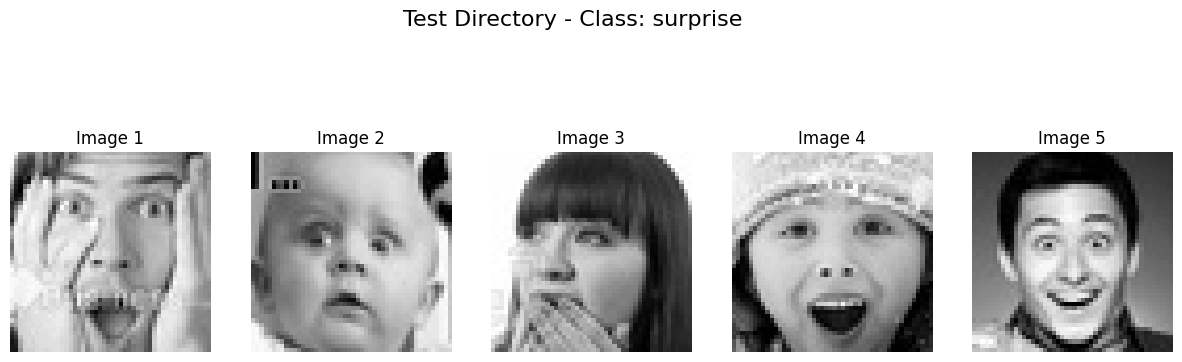

In [15]:
def display_images_from_folders(directory, title):
 
    folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    
    for folder in folders:
        folder_path = os.path.join(directory, folder)
        image_files = os.listdir(folder_path)[:5]  
        
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        fig.suptitle(f"{title} - Class: {folder}", fontsize=16)
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            axes[i].imshow(image, cmap='gray')
            axes[i].axis('off')  
            axes[i].set_title(f"Image {i+1}")
        
        plt.show()

display_images_from_folders(train_dir, 'Train Directory')

display_images_from_folders(test_dir, 'Test Directory')

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


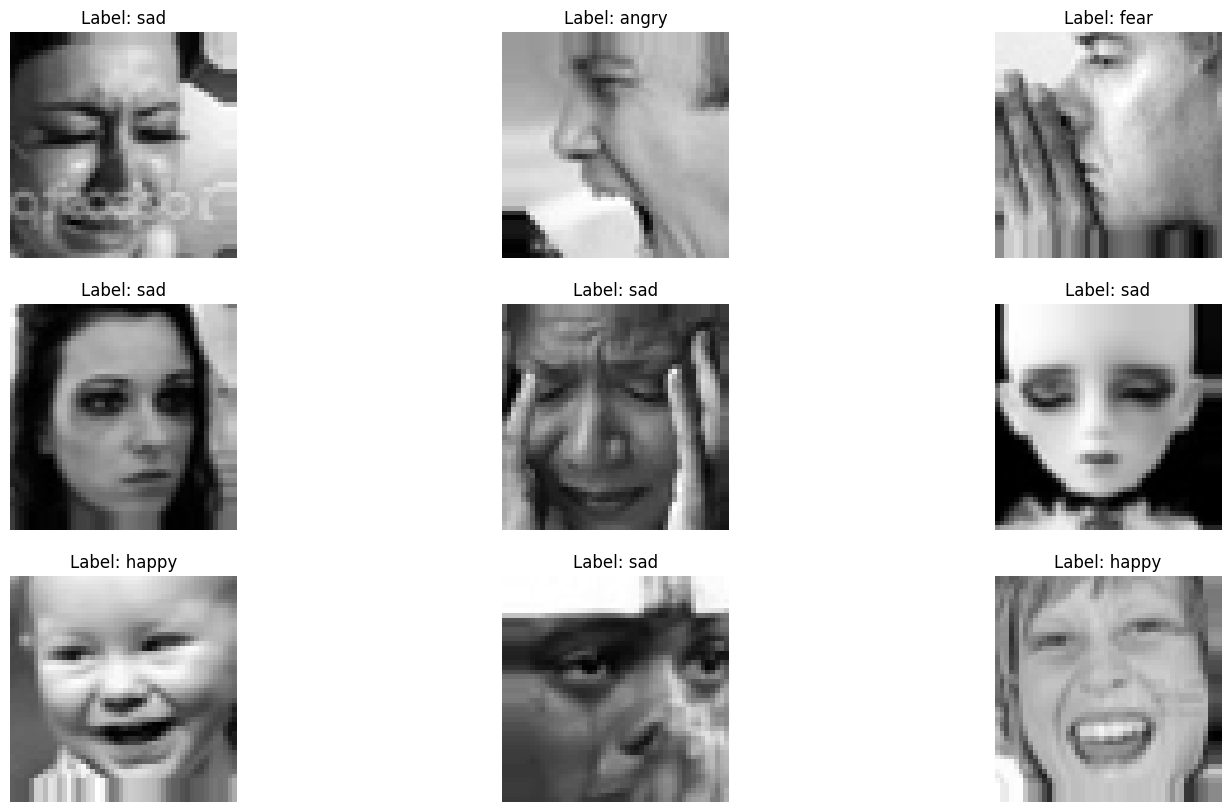

In [18]:
def visualize_samples(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(18, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i].reshape(48, 48), cmap='gray')
        label_index = np.argmax(y_batch[i])
        plt.title(f"Label: {class_names[label_index]}")
        plt.axis('off')
    plt.show()

visualize_samples(train_generator)

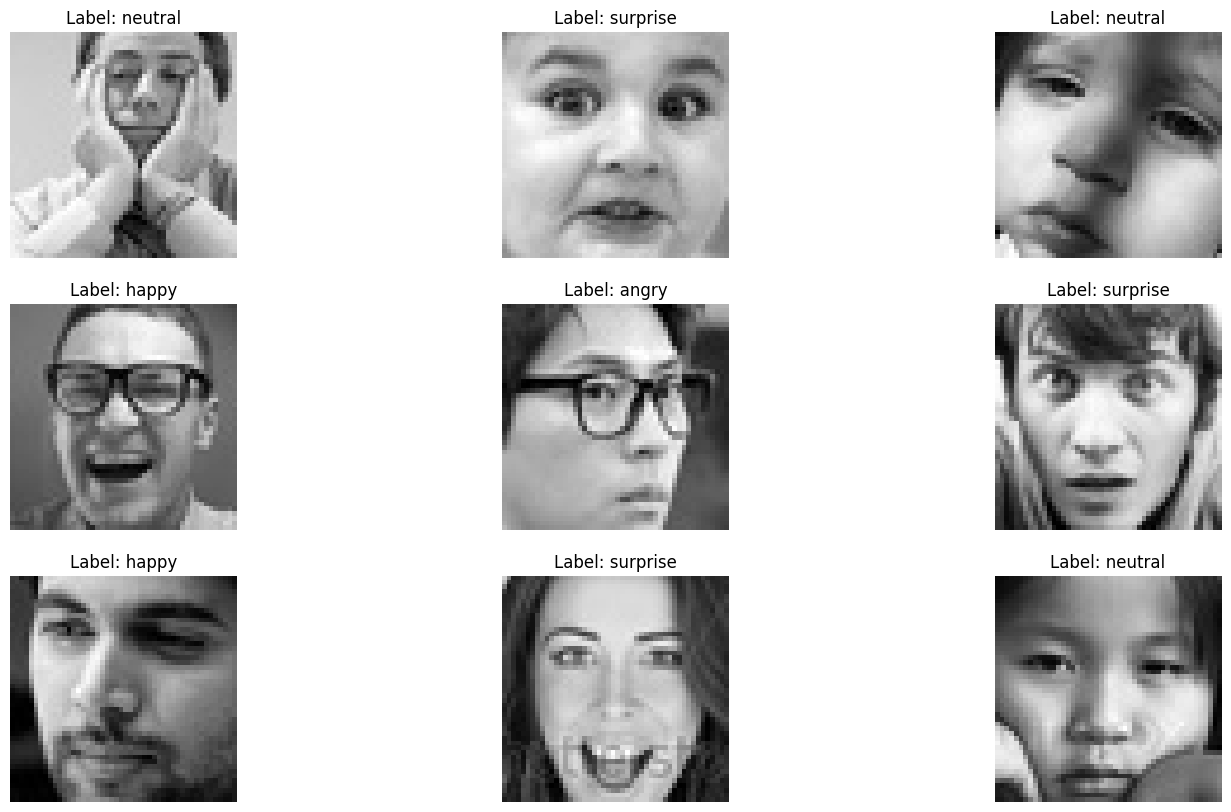

In [19]:
visualize_samples(validation_generator)


In [20]:
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [21]:
train_df


filepaths    labels
0      C:/College/Semester 5/Computer Vision/Project/...     angry
1      C:/College/Semester 5/Computer Vision/Project/...     angry
2      C:/College/Semester 5/Computer Vision/Project/...     angry
3      C:/College/Semester 5/Computer Vision/Project/...     angry
4      C:/College/Semester 5/Computer Vision/Project/...     angry
...                                                  ...       ...
28704  C:/College/Semester 5/Computer Vision/Project/...  surprise
28705  C:/College/Semester 5/Computer Vision/Project/...  surprise
28706  C:/College/Semester 5/Computer Vision/Project/...  surprise
28707  C:/College/Semester 5/Computer Vision/Project/...  surprise
28708  C:/College/Semester 5/Computer Vision/Project/...  surprise

[28709 rows x 2 columns]

In [22]:
!pip install --upgrade imbalanced-learn

In [23]:
!pip install --upgrade scikit-learn

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_df[['filepaths']], train_df['labels'])

balanced_train_df = pd.DataFrame({
    'filepaths': X_resampled['filepaths'],
    'labels': y_resampled
})

C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



In [25]:
balanced_train_df['labels'].unique()


array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [26]:
balanced_train_df['labels'].value_counts()


labels
angry       7215
disgust     7215
fear        7215
happy       7215
neutral     7215
sad         7215
surprise    7215
Name: count, dtype: int64

In [27]:
balanced_train_df

filepaths    labels
0      C:/College/Semester 5/Computer Vision/Project/...     angry
1      C:/College/Semester 5/Computer Vision/Project/...     angry
2      C:/College/Semester 5/Computer Vision/Project/...     angry
3      C:/College/Semester 5/Computer Vision/Project/...     angry
4      C:/College/Semester 5/Computer Vision/Project/...     angry
...                                                  ...       ...
50500  C:/College/Semester 5/Computer Vision/Project/...  surprise
50501  C:/College/Semester 5/Computer Vision/Project/...  surprise
50502  C:/College/Semester 5/Computer Vision/Project/...  surprise
50503  C:/College/Semester 5/Computer Vision/Project/...  surprise
50504  C:/College/Semester 5/Computer Vision/Project/...  surprise

[50505 rows x 2 columns]

In [28]:
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [29]:
ts_df

filepaths    labels
0     C:/College/Semester 5/Computer Vision/Project/...     angry
1     C:/College/Semester 5/Computer Vision/Project/...     angry
2     C:/College/Semester 5/Computer Vision/Project/...     angry
3     C:/College/Semester 5/Computer Vision/Project/...     angry
4     C:/College/Semester 5/Computer Vision/Project/...     angry
...                                                 ...       ...
7173  C:/College/Semester 5/Computer Vision/Project/...  surprise
7174  C:/College/Semester 5/Computer Vision/Project/...  surprise
7175  C:/College/Semester 5/Computer Vision/Project/...  surprise
7176  C:/College/Semester 5/Computer Vision/Project/...  surprise
7177  C:/College/Semester 5/Computer Vision/Project/...  surprise

[7178 rows x 2 columns]

In [30]:
ts_df['labels'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [31]:
ts_df['labels'].value_counts()

labels
happy       1774
sad         1247
neutral     1233
fear        1024
angry        958
surprise     831
disgust      111
Name: count, dtype: int64

In [32]:
ros = RandomOverSampler(random_state=42)
X_resampled_ts, y_resampled_ts = ros.fit_resample(ts_df[['filepaths']], ts_df['labels'])

balanced_ts_df = pd.DataFrame({
    'filepaths': X_resampled_ts['filepaths'],
    'labels': y_resampled_ts
})

C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



In [33]:
balanced_ts_df

filepaths    labels
0      C:/College/Semester 5/Computer Vision/Project/...     angry
1      C:/College/Semester 5/Computer Vision/Project/...     angry
2      C:/College/Semester 5/Computer Vision/Project/...     angry
3      C:/College/Semester 5/Computer Vision/Project/...     angry
4      C:/College/Semester 5/Computer Vision/Project/...     angry
...                                                  ...       ...
12413  C:/College/Semester 5/Computer Vision/Project/...  surprise
12414  C:/College/Semester 5/Computer Vision/Project/...  surprise
12415  C:/College/Semester 5/Computer Vision/Project/...  surprise
12416  C:/College/Semester 5/Computer Vision/Project/...  surprise
12417  C:/College/Semester 5/Computer Vision/Project/...  surprise

[12418 rows x 2 columns]

In [34]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [35]:
valid_df, test_df = train_test_split(balanced_train_df,  train_size= 0.2, shuffle= True, random_state= 42)

In [35]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(balanced_train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                     color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe(ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 50505 validated image filenames belonging to 7 classes.
Found 10101 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.


In [36]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [37]:
## Convolutional Neural Network (CNN)
print('Convolutional Neural Network (CNN)')

## After we compare the architecture, we discuss to using resnet architecture, but we modify the architecture for better performa and accuracy

img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), 
    
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
       
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")  
])

model.summary()

Convolutional Neural Network (CNN)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_1

In [38]:
model.compile (Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [39]:
epochs = 3

history = model.fit(train_gen , epochs= epochs , verbose= 1, validation_data= test_gen, shuffle= False)

Epoch 1/3
3157/3157 [==============================] - 530s 162ms/step - loss: 1.6569 - accuracy: 0.3423 - val_loss: 1.5751 - val_accuracy: 0.3934
Epoch 2/3
3157/3157 [==============================] - 512s 162ms/step - loss: 1.0678 - accuracy: 0.5886 - val_loss: 1.5124 - val_accuracy: 0.4521
Epoch 3/3
3157/3157 [==============================] - 485s 154ms/step - loss: 0.6580 - accuracy: 0.7699 - val_loss: 1.3769 - val_accuracy: 0.5265


In [40]:
loss, accuracy = model.evaluate(test_gen)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

449/449 [==============================] - 20s 44ms/step - loss: 1.3769 - accuracy: 0.5265
Validation Accuracy: 52.65%


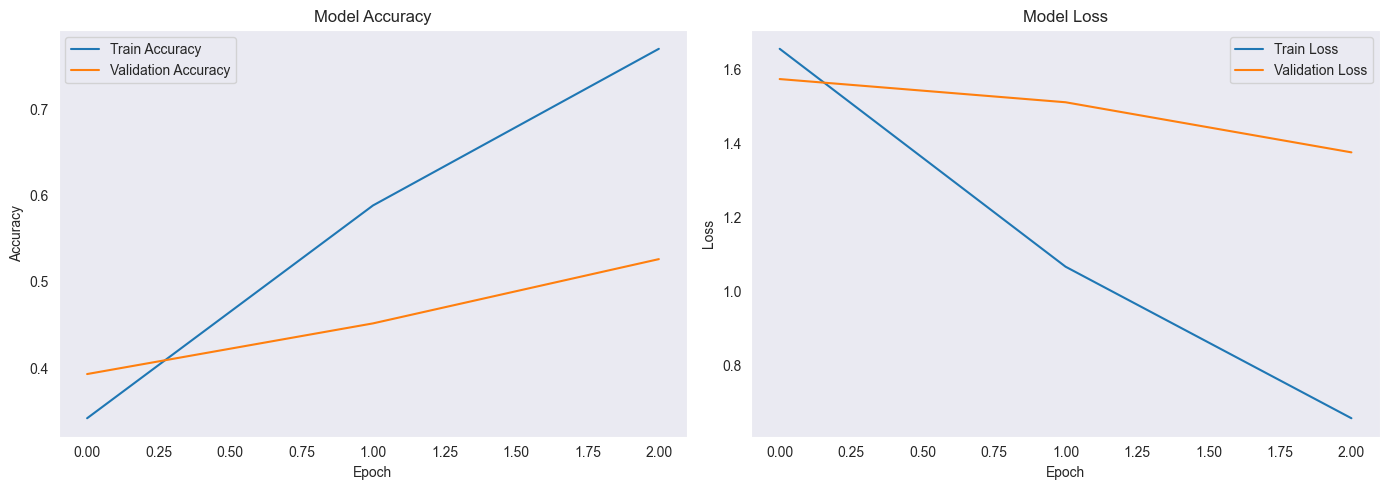

In [41]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


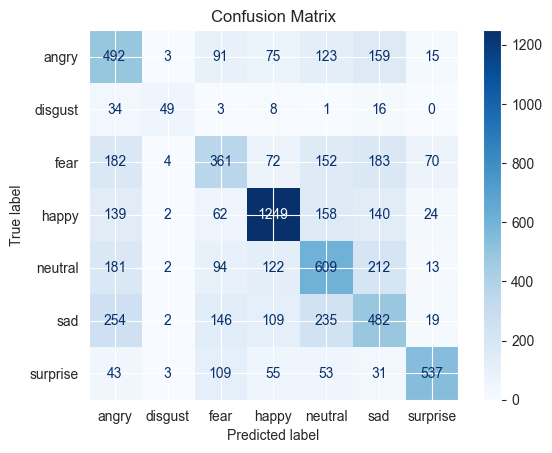

              precision    recall  f1-score   support

       angry       0.37      0.51      0.43       958
     disgust       0.75      0.44      0.56       111
        fear       0.42      0.35      0.38      1024
       happy       0.74      0.70      0.72      1774
     neutral       0.46      0.49      0.48      1233
         sad       0.39      0.39      0.39      1247
    surprise       0.79      0.65      0.71       831

    accuracy                           0.53      7178
   macro avg       0.56      0.51      0.52      7178
weighted avg       0.54      0.53      0.53      7178



In [42]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen.classes
predicted_labels = model.predict(test_gen)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen.class_indices.keys())
print(report)

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Add, Flatten, Dense, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define a ResNet block
def resnet_block(inputs, filters, kernel_size=(3, 3), stride=1):
    # First Conv Layer
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second Conv Layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Add the shortcut (skip connection)
    shortcut = inputs
    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Input shape
input_shape = (224, 224, 1)  # Grayscale images
inputs = Input(shape=input_shape)

# Initial Conv Layer
x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Residual Blocks (ResNet Blocks)
x = resnet_block(x, filters=64)
x = resnet_block(x, filters=128, stride=2)
x = resnet_block(x, filters=256, stride=2)
x = resnet_block(x, filters=512, stride=2)

# Flatten and Dense Layers
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(256, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
outputs = Dense(7, activation="softmax")(x)  # 7 output classes

# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [44]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
epochs = 10
history = model.fit(train_gen, epochs=epochs, verbose=1, validation_data=valid_gen, shuffle=False)

Epoch 1/10
3157/3157 [==============================] - 101s 31ms/step - loss: 1.8824 - accuracy: 0.2167 - val_loss: 1.7353 - val_accuracy: 0.2824
Epoch 2/10
3157/3157 [==============================] - 98s 31ms/step - loss: 1.6460 - accuracy: 0.3201 - val_loss: 1.5494 - val_accuracy: 0.3431
Epoch 3/10
3157/3157 [==============================] - 98s 31ms/step - loss: 1.5451 - accuracy: 0.3535 - val_loss: 1.4958 - val_accuracy: 0.3598
Epoch 4/10
3157/3157 [==============================] - 98s 31ms/step - loss: 1.5018 - accuracy: 0.3633 - val_loss: 1.4495 - val_accuracy: 0.3700
Epoch 5/10
3157/3157 [==============================] - 98s 31ms/step - loss: 1.4578 - accuracy: 0.3877 - val_loss: 1.4115 - val_accuracy: 0.4044
Epoch 6/10
3157/3157 [==============================] - 97s 31ms/step - loss: 1.4058 - accuracy: 0.4151 - val_loss: 1.3353 - val_accuracy: 0.4441
Epoch 7/10
3157/3157 [==============================] - 100s 32ms/step - loss: 1.3264 - accuracy: 0.4548 - val_loss: 1.2337

In [46]:
test_gen_new = ts_gen.flow_from_dataframe(balanced_ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 12418 validated image filenames belonging to 7 classes.


In [47]:
loss, accuracy = model.evaluate(test_gen)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

449/449 [==============================] - 135s 302ms/step - loss: 1.5678 - accuracy: 0.4100
Validation Accuracy: 41.00%


In [48]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

777/777 [==============================] - 9s 11ms/step - loss: 1.8777 - accuracy: 0.4241
Validation Accuracy: 42.41%


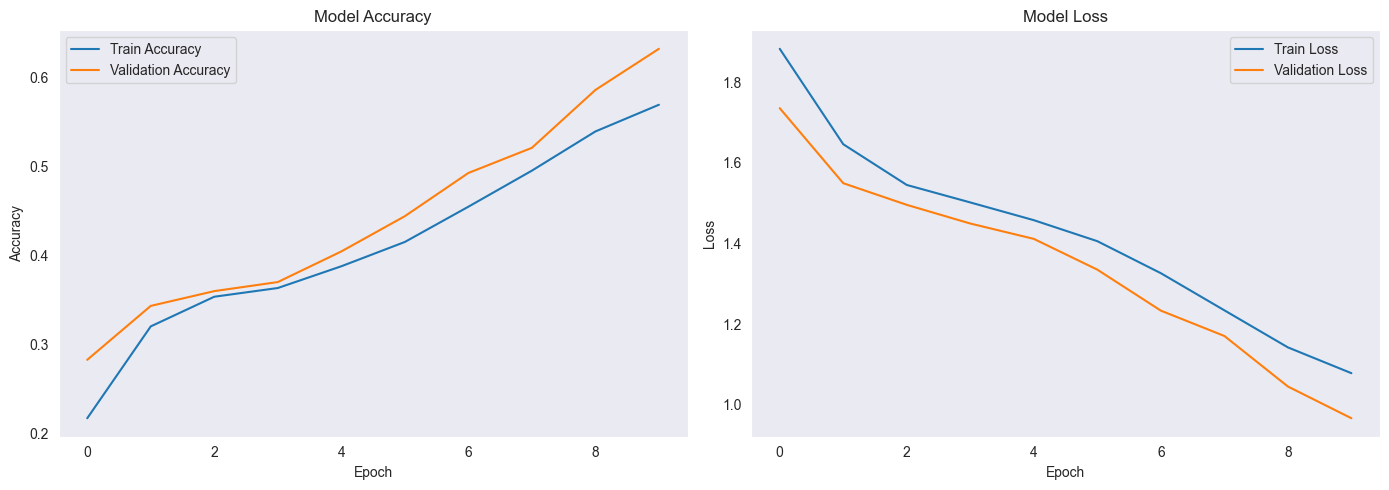

In [49]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

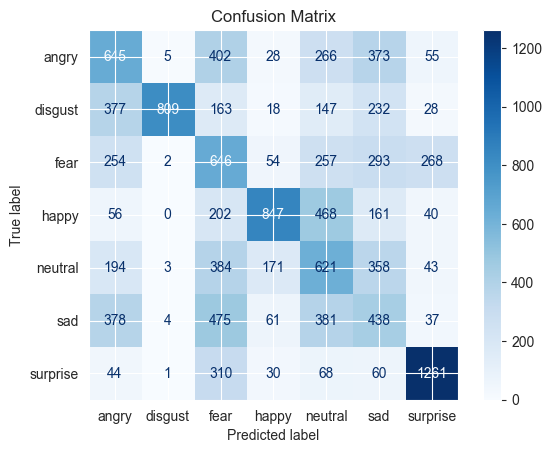

              precision    recall  f1-score   support

       angry       0.33      0.36      0.35      1774
     disgust       0.98      0.46      0.62      1774
        fear       0.25      0.36      0.30      1774
       happy       0.70      0.48      0.57      1774
     neutral       0.28      0.35      0.31      1774
         sad       0.23      0.25      0.24      1774
    surprise       0.73      0.71      0.72      1774

    accuracy                           0.42     12418
   macro avg       0.50      0.42      0.44     12418
weighted avg       0.50      0.42      0.44     12418



In [50]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [38]:
train_df_new, temp_df_new = train_test_split(
    balanced_train_df,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=balanced_train_df['labels']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['labels'] 
)

In [52]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen_new = tr_gen.flow_from_dataframe(train_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

valid_gen_new = ts_gen.flow_from_dataframe(valid_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                     color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

test_gen_new = ts_gen.flow_from_dataframe(test_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 40404 validated image filenames belonging to 7 classes.
Found 5050 validated image filenames belonging to 7 classes.
Found 5051 validated image filenames belonging to 7 classes.


In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Add, Flatten, Dense, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def resnet_block(inputs, filters, kernel_size=(3, 3), stride=1):
    # First Conv Layer
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second Conv Layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Add the shortcut (skip connection)
    shortcut = inputs
    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Input shape
input_shape = (224, 224, 1)  # Grayscale images
inputs = Input(shape=input_shape)

# Initial Conv Layer
x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Residual Blocks (ResNet Blocks)
x = resnet_block(x, filters=64)
x = resnet_block(x, filters=128, stride=2)
x = resnet_block(x, filters=256, stride=2)
x = resnet_block(x, filters=512, stride=2)

# Flatten and Dense Layers
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(256, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
outputs = Dense(7, activation="softmax")(x)  # 7 output classes

# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [54]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
epochs = 15
history = model.fit(train_gen_new, epochs=epochs, verbose=1, validation_data=valid_gen_new, shuffle=False)

Epoch 1/15
2526/2526 [==============================] - 176s 69ms/step - loss: 1.8586 - accuracy: 0.2352 - val_loss: 1.8175 - val_accuracy: 0.2703
Epoch 2/15
2526/2526 [==============================] - 153s 59ms/step - loss: 1.5678 - accuracy: 0.3740 - val_loss: 1.4161 - val_accuracy: 0.4216
Epoch 3/15
2526/2526 [==============================] - 76s 30ms/step - loss: 1.3451 - accuracy: 0.4593 - val_loss: 1.2699 - val_accuracy: 0.4820
Epoch 4/15
2526/2526 [==============================] - 75s 30ms/step - loss: 1.2206 - accuracy: 0.5120 - val_loss: 1.2753 - val_accuracy: 0.5156
Epoch 5/15
2526/2526 [==============================] - 76s 30ms/step - loss: 1.1191 - accuracy: 0.5620 - val_loss: 1.1807 - val_accuracy: 0.5337
Epoch 6/15
2526/2526 [==============================] - 77s 30ms/step - loss: 1.0297 - accuracy: 0.6028 - val_loss: 1.1987 - val_accuracy: 0.5451
Epoch 7/15
2526/2526 [==============================] - 76s 30ms/step - loss: 0.9224 - accuracy: 0.6534 - val_loss: 1.1171

In [56]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

316/316 [==============================] - 15s 48ms/step - loss: 0.8672 - accuracy: 0.7418
Test Accuracy: 74.18%


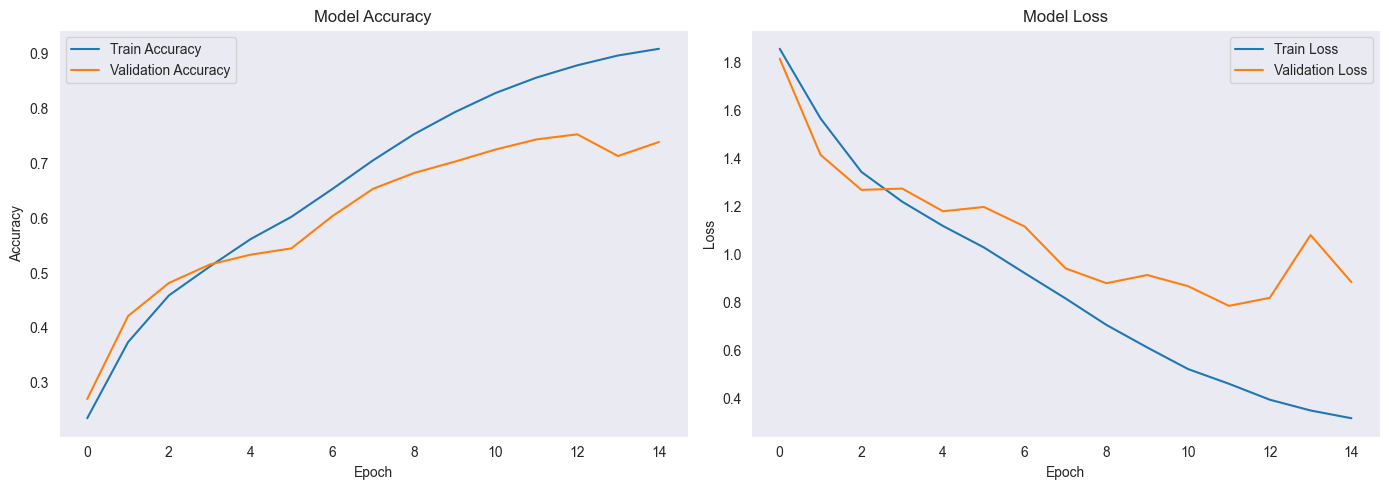

In [57]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

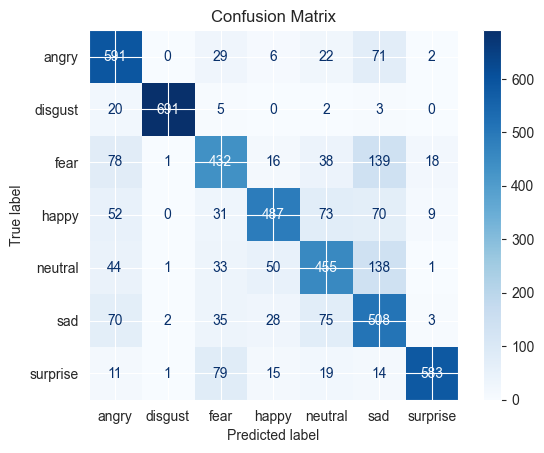

              precision    recall  f1-score   support

       angry       0.68      0.82      0.74       721
     disgust       0.99      0.96      0.98       721
        fear       0.67      0.60      0.63       722
       happy       0.81      0.67      0.74       722
     neutral       0.67      0.63      0.65       722
         sad       0.54      0.70      0.61       721
    surprise       0.95      0.81      0.87       722

    accuracy                           0.74      5051
   macro avg       0.76      0.74      0.75      5051
weighted avg       0.76      0.74      0.75      5051



In [58]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [59]:
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), 
    
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
       
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")  
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_28 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_29 (Batc (None, 112, 112, 128)    

In [60]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
epochs = 15
history = model.fit(train_gen_new, epochs=epochs, verbose=1, validation_data=valid_gen_new, shuffle=False)

Epoch 1/15
2526/2526 [==============================] - 377s 149ms/step - loss: 1.8189 - accuracy: 0.2704 - val_loss: 1.4524 - val_accuracy: 0.4222
Epoch 2/15
2526/2526 [==============================] - 422s 167ms/step - loss: 1.2427 - accuracy: 0.5122 - val_loss: 1.0748 - val_accuracy: 0.5855
Epoch 3/15
2526/2526 [==============================] - 376s 149ms/step - loss: 0.8528 - accuracy: 0.6896 - val_loss: 0.8539 - val_accuracy: 0.7020
Epoch 4/15
2526/2526 [==============================] - 375s 149ms/step - loss: 0.4704 - accuracy: 0.8422 - val_loss: 0.7276 - val_accuracy: 0.7562
Epoch 5/15
2526/2526 [==============================] - 375s 149ms/step - loss: 0.2629 - accuracy: 0.9193 - val_loss: 0.8211 - val_accuracy: 0.7640
Epoch 6/15
2526/2526 [==============================] - 375s 148ms/step - loss: 0.1700 - accuracy: 0.9518 - val_loss: 0.7794 - val_accuracy: 0.7943
Epoch 7/15
2526/2526 [==============================] - 375s 148ms/step - loss: 0.1342 - accuracy: 0.9637 - val_

In [62]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

316/316 [==============================] - 17s 54ms/step - loss: 1.7763 - accuracy: 0.8186
Test Accuracy: 81.86%


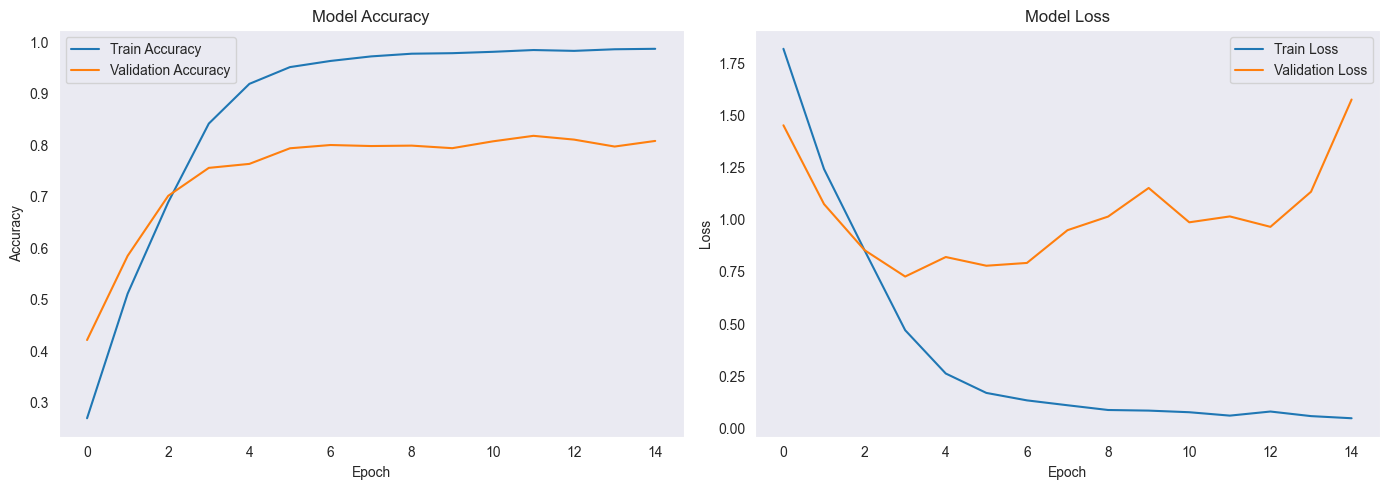

In [63]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


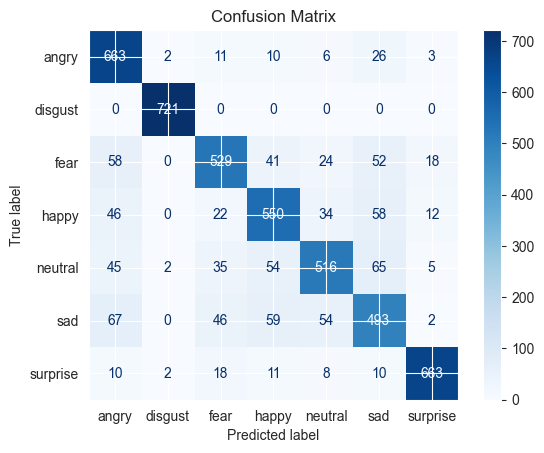

              precision    recall  f1-score   support

       angry       0.75      0.92      0.82       721
     disgust       0.99      1.00      1.00       721
        fear       0.80      0.73      0.77       722
       happy       0.76      0.76      0.76       722
     neutral       0.80      0.71      0.76       722
         sad       0.70      0.68      0.69       721
    surprise       0.94      0.92      0.93       722

    accuracy                           0.82      5051
   macro avg       0.82      0.82      0.82      5051
weighted avg       0.82      0.82      0.82      5051



In [64]:
true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class SEBlock(layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(SEBlock, self).__init__()
        self.squeeze = layers.GlobalAveragePooling2D()
        self.fc1 = layers.Dense(channels // reduction_ratio, activation='relu')
        self.fc2 = layers.Dense(channels, activation='sigmoid')

    def call(self, inputs):
        se = self.squeeze(inputs)
        se = self.fc1(se)
        se = self.fc2(se)
        se = tf.reshape(se, [-1, 1, 1, tf.shape(inputs)[-1]])
        return inputs * se

img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

inputs = layers.Input(shape=img_shape)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = SEBlock(512)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(7, activation="softmax")(x)  

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_32 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 112, 112, 128)     1475

In [66]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
epochs = 15
history = model.fit(train_gen_new, epochs=epochs, verbose=1, validation_data=valid_gen_new, shuffle=False)

Epoch 1/15
2526/2526 [==============================] - 377s 148ms/step - loss: 1.6365 - accuracy: 0.3464 - val_loss: 1.3104 - val_accuracy: 0.4855
Epoch 2/15
2526/2526 [==============================] - 374s 148ms/step - loss: 1.1043 - accuracy: 0.5809 - val_loss: 1.0570 - val_accuracy: 0.6085
Epoch 3/15
2526/2526 [==============================] - 374s 148ms/step - loss: 0.7370 - accuracy: 0.7387 - val_loss: 0.9652 - val_accuracy: 0.6859
Epoch 4/15
2526/2526 [==============================] - 374s 148ms/step - loss: 0.4451 - accuracy: 0.8505 - val_loss: 0.7952 - val_accuracy: 0.7531
Epoch 5/15
2526/2526 [==============================] - 374s 148ms/step - loss: 0.2748 - accuracy: 0.9134 - val_loss: 0.7624 - val_accuracy: 0.7750
Epoch 6/15
2526/2526 [==============================] - 374s 148ms/step - loss: 0.1942 - accuracy: 0.9416 - val_loss: 0.9029 - val_accuracy: 0.7826
Epoch 7/15
2526/2526 [==============================] - 378s 150ms/step - loss: 0.1608 - accuracy: 0.9559 - val_

In [68]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

316/316 [==============================] - 14s 43ms/step - loss: 1.0968 - accuracy: 0.8091
Test Accuracy: 80.91%


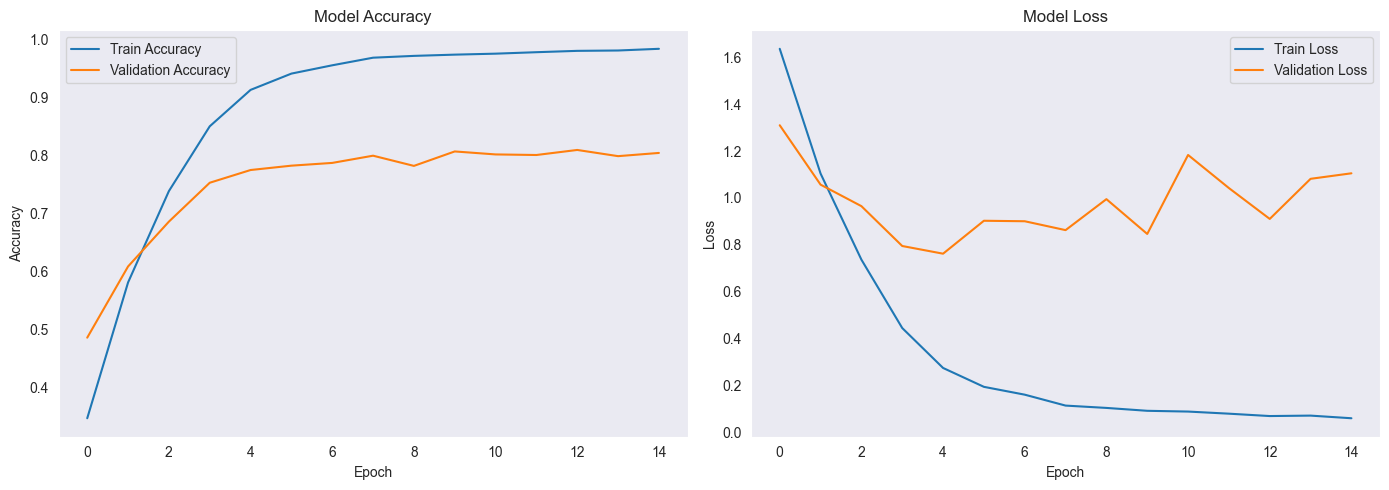

In [69]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

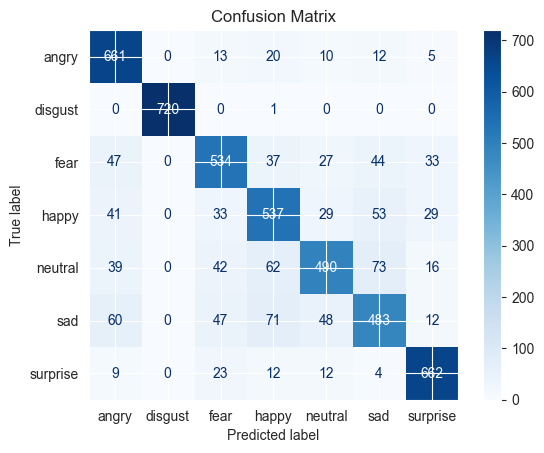

              precision    recall  f1-score   support

       angry       0.77      0.92      0.84       721
     disgust       1.00      1.00      1.00       721
        fear       0.77      0.74      0.76       722
       happy       0.73      0.74      0.73       722
     neutral       0.80      0.68      0.73       722
         sad       0.72      0.67      0.69       721
    surprise       0.87      0.92      0.90       722

    accuracy                           0.81      5051
   macro avg       0.81      0.81      0.81      5051
weighted avg       0.81      0.81      0.81      5051



In [70]:
true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [90]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class SEBlock(layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(SEBlock, self).__init__()
        self.squeeze = layers.GlobalAveragePooling2D()
        self.fc1 = layers.Dense(channels // reduction_ratio, activation='relu')
        self.fc2 = layers.Dense(channels, activation='sigmoid')

    def call(self, inputs):
        se = self.squeeze(inputs)
        se = self.fc1(se)
        se = self.fc2(se)
        se = tf.reshape(se, [-1, 1, 1, tf.shape(inputs)[-1]])  
        return inputs * se

class CAMBlock(layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(CAMBlock, self).__init__()
        self.channels = channels
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.global_max_pool = layers.GlobalMaxPooling2D()
        self.dense1 = layers.Dense(channels // reduction_ratio, activation='relu')
        self.dense2 = layers.Dense(channels, activation='sigmoid')

    def call(self, inputs):
        avg_pool = self.global_avg_pool(inputs)
        max_pool = self.global_max_pool(inputs)
        avg_out = self.dense2(self.dense1(avg_pool))
        max_out = self.dense2(self.dense1(max_pool))
        out = avg_out + max_out
        out = tf.reshape(out, [-1, 1, 1, self.channels])
        return inputs * out

img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

inputs = layers.Input(shape=img_shape)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = SEBlock(128)(x)
x = CAMBlock(128)(x)

x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = SEBlock(512)(x)
x = CAMBlock(512)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(7, activation="softmax")(x)  

model = Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_52 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 112, 112, 128)     1475

In [91]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [92]:
epochs = 10
history = model.fit(train_gen_new, epochs=epochs, verbose=1, validation_data=valid_gen_new, shuffle=False)

Epoch 1/10
2526/2526 [==============================] - 396s 156ms/step - loss: 1.5697 - accuracy: 0.3773 - val_loss: 1.2419 - val_accuracy: 0.5067
Epoch 2/10
2526/2526 [==============================] - 391s 155ms/step - loss: 1.0321 - accuracy: 0.6108 - val_loss: 0.9464 - val_accuracy: 0.6432
Epoch 3/10
2526/2526 [==============================] - 437s 173ms/step - loss: 0.6158 - accuracy: 0.7840 - val_loss: 0.8760 - val_accuracy: 0.7162
Epoch 4/10
2526/2526 [==============================] - 515s 204ms/step - loss: 0.3275 - accuracy: 0.8952 - val_loss: 0.7624 - val_accuracy: 0.7723
Epoch 5/10
2526/2526 [==============================] - 528s 209ms/step - loss: 0.1930 - accuracy: 0.9410 - val_loss: 0.7584 - val_accuracy: 0.7853
Epoch 6/10
2526/2526 [==============================] - 525s 208ms/step - loss: 0.1394 - accuracy: 0.9599 - val_loss: 0.8355 - val_accuracy: 0.7715
Epoch 7/10
2526/2526 [==============================] - 777s 308ms/step - loss: 0.1130 - accuracy: 0.9702 - val_

In [93]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

316/316 [==============================] - 14s 45ms/step - loss: 1.1641 - accuracy: 0.8040
Test Accuracy: 80.40%


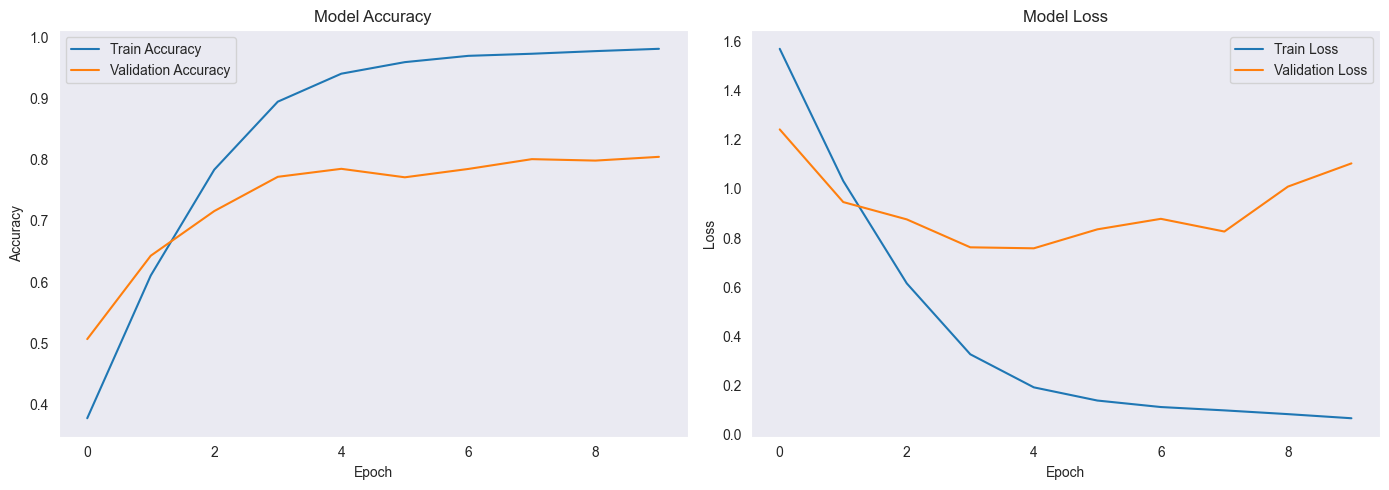

In [94]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


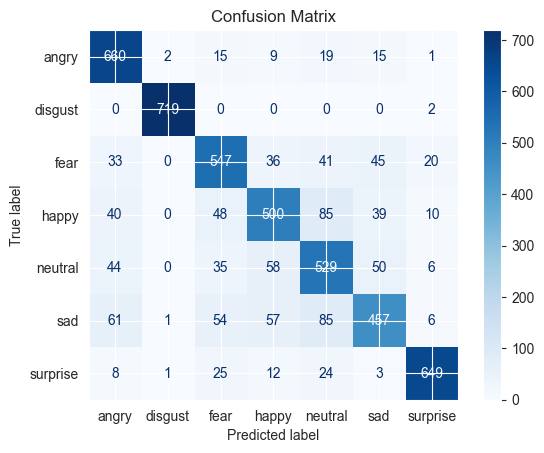

              precision    recall  f1-score   support

       angry       0.78      0.92      0.84       721
     disgust       0.99      1.00      1.00       721
        fear       0.76      0.76      0.76       722
       happy       0.74      0.69      0.72       722
     neutral       0.68      0.73      0.70       722
         sad       0.75      0.63      0.69       721
    surprise       0.94      0.90      0.92       722

    accuracy                           0.80      5051
   macro avg       0.81      0.80      0.80      5051
weighted avg       0.81      0.80      0.80      5051



In [95]:
true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [96]:
# Save the model
model.save('emotion_model.h5')
print("Model saved to emotion_model.h5")

NotImplementedError: Layer SEBlock has arguments in `__init__` and therefore must override `get_config`.

In [39]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen_resnet = tr_gen.flow_from_dataframe(
    train_df_new, 
    x_col='filepaths', 
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',  # change from 'sparse' to 'categorical'
    color_mode='grayscale', 
    shuffle=True, 
    batch_size=batch_size
)

valid_gen_resnet = ts_gen.flow_from_dataframe(
    valid_df_new, 
    x_col='filepaths', 
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',  # change from 'sparse' to 'categorical'
    color_mode='grayscale', 
    shuffle=True, 
    batch_size=batch_size
)

test_gen_resnet = ts_gen.flow_from_dataframe(
    test_df_new, 
    x_col='filepaths', 
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',  # change from 'sparse' to 'categorical'
    color_mode='grayscale', 
    shuffle=False, 
    batch_size=batch_size
)


Found 40404 validated image filenames belonging to 7 classes.
Found 5050 validated image filenames belonging to 7 classes.
Found 5051 validated image filenames belonging to 7 classes.


In [40]:
import os
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import backend as K

# Define image size and channels (Grayscale - 1 channel)
img_size = (224, 224)
channels = 1  # For grayscale images
img_shape = (img_size[0], img_size[1], channels)

# Input layer (Accept grayscale input)
inputs = layers.Input(shape=img_shape)

# Convert grayscale (1 channel) to pseudo-RGB (3 channels) by duplicating the grayscale input across the 3 channels
x = layers.Conv2D(3, (1, 1), strides=(1, 1), padding='same', use_bias=False)(inputs)  # Duplicate channels

# Load pre-trained ResNet50 model (excluding top layers for transfer learning)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the base model layers to prevent training
base_model.trainable = False

# Add custom layers on top
x = base_model(x)  # Pass through ResNet50
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(7, activation="softmax")(x)

# Final model
model = Model(inputs=inputs, outputs=outputs)

# Print model summary
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 3)       3         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1799  

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
# Check the first batch
x_batch, y_batch = next(train_gen_resnet)
print(f"x_batch shape: {x_batch.shape}")
print(f"y_batch shape: {y_batch.shape}")


x_batch shape: (16, 224, 224, 1)
y_batch shape: (16, 7)


In [43]:
epochs = 10
history = model.fit(train_gen_resnet, epochs=epochs, verbose=1, validation_data=valid_gen_resnet, shuffle=False)


Epoch 1/10
2526/2526 [==============================] - 288s 108ms/step - loss: 1.4970 - accuracy: 0.4292 - val_loss: 1.3792 - val_accuracy: 0.4659
Epoch 2/10
2526/2526 [==============================] - 263s 104ms/step - loss: 1.2028 - accuracy: 0.5425 - val_loss: 1.1285 - val_accuracy: 0.5636
Epoch 3/10
2526/2526 [==============================] - 263s 104ms/step - loss: 1.0925 - accuracy: 0.5837 - val_loss: 1.0767 - val_accuracy: 0.5840
Epoch 4/10
2526/2526 [==============================] - 274s 108ms/step - loss: 1.0182 - accuracy: 0.6107 - val_loss: 1.0536 - val_accuracy: 0.6042
Epoch 5/10
2526/2526 [==============================] - 262s 104ms/step - loss: 0.9608 - accuracy: 0.6339 - val_loss: 1.0183 - val_accuracy: 0.6176
Epoch 6/10
2526/2526 [==============================] - 262s 104ms/step - loss: 0.9074 - accuracy: 0.6571 - val_loss: 1.0152 - val_accuracy: 0.6123
Epoch 7/10
2526/2526 [==============================] - 264s 105ms/step - loss: 0.8609 - accuracy: 0.6771 - val_

In [44]:
# Save the model
model.save('emotion_model_resnet50.h5')
print("Model saved to emotion_model_resnet50.h5")



Model saved to emotion_model_resnet50.h5


In [45]:
loss, accuracy = model.evaluate(test_gen_resnet)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

316/316 [==============================] - 18s 55ms/step - loss: 0.9488 - accuracy: 0.6605
Test Accuracy: 66.05%


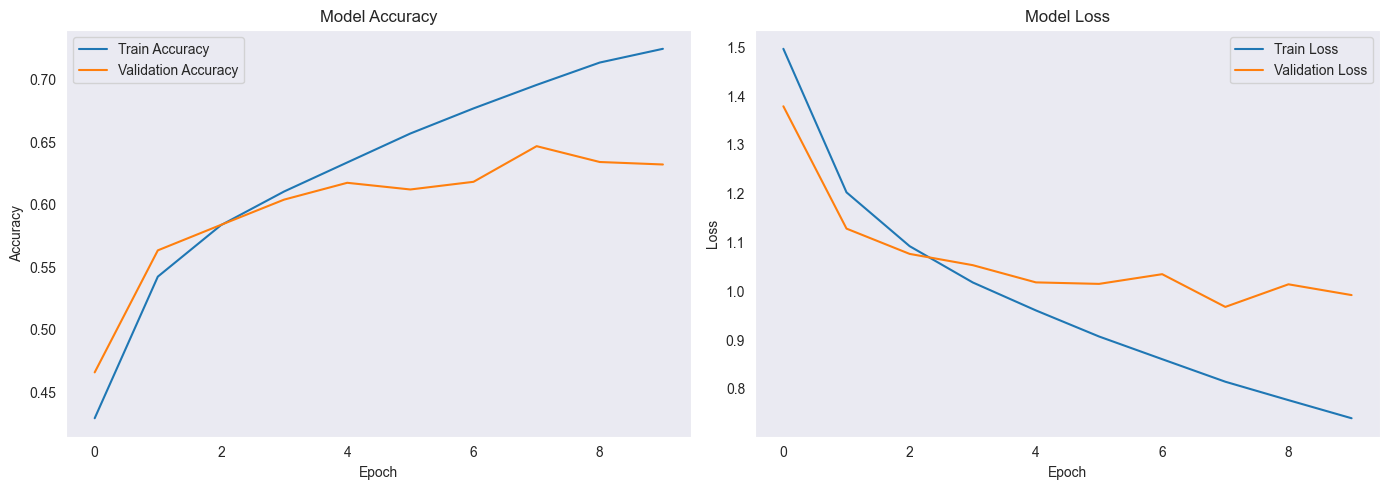

In [46]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


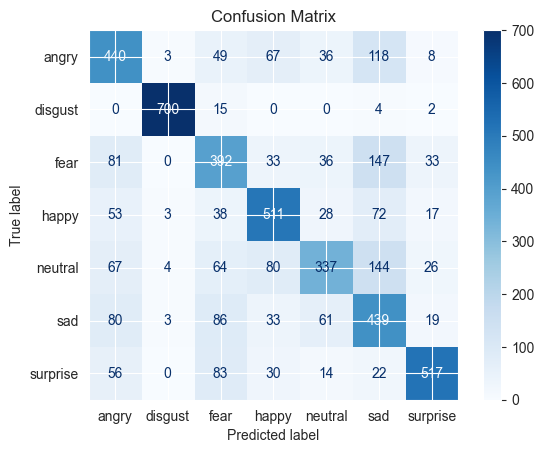

              precision    recall  f1-score   support

       angry       0.57      0.61      0.59       721
     disgust       0.98      0.97      0.98       721
        fear       0.54      0.54      0.54       722
       happy       0.68      0.71      0.69       722
     neutral       0.66      0.47      0.55       722
         sad       0.46      0.61      0.53       721
    surprise       0.83      0.72      0.77       722

    accuracy                           0.66      5051
   macro avg       0.67      0.66      0.66      5051
weighted avg       0.67      0.66      0.66      5051



In [52]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen_resnet.classes
predicted_labels = model.predict(test_gen_resnet)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_resnet.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_resnet.class_indices.keys())
print(report)

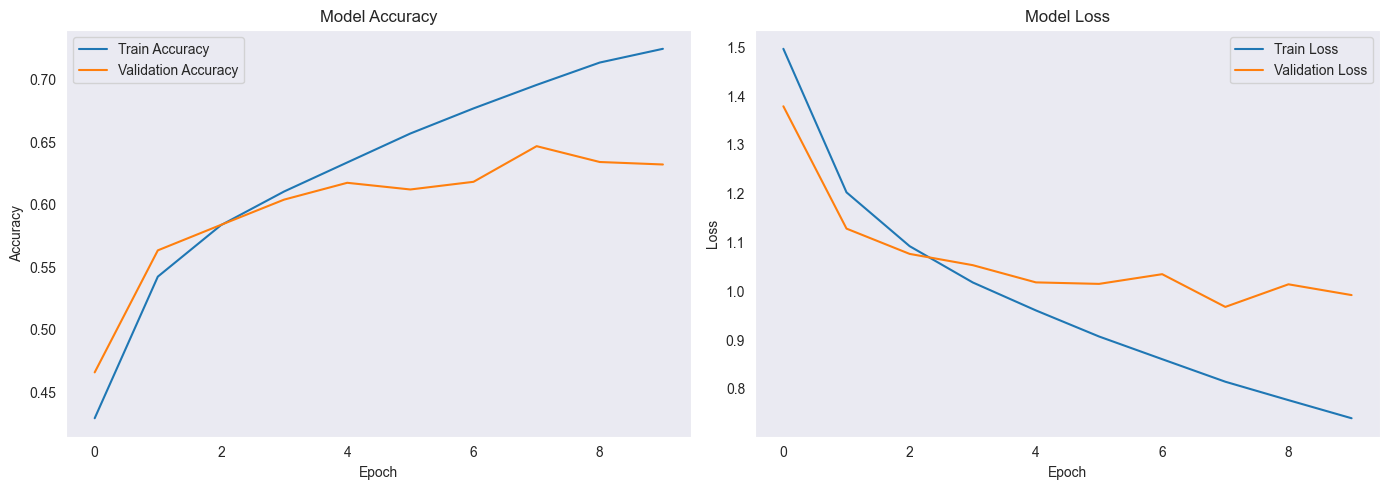

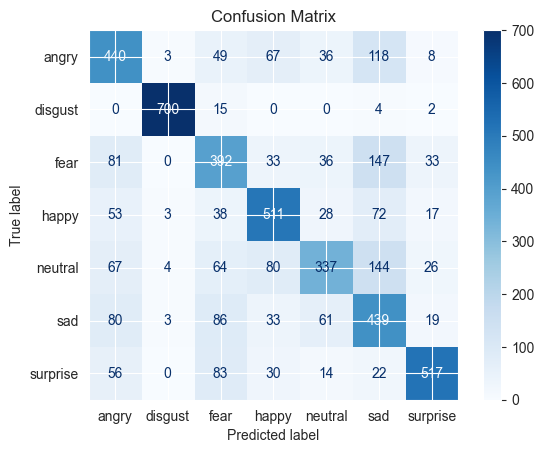

              precision    recall  f1-score   support

       angry       0.57      0.61      0.59       721
     disgust       0.98      0.97      0.98       721
        fear       0.54      0.54      0.54       722
       happy       0.68      0.71      0.69       722
     neutral       0.66      0.47      0.55       722
         sad       0.46      0.61      0.53       721
    surprise       0.83      0.72      0.77       722

    accuracy                           0.66      5051
   macro avg       0.67      0.66      0.66      5051
weighted avg       0.67      0.66      0.66      5051



In [55]:
# Plot training history
plot_training_history(history)

# Evaluate the model on test data
true_labels = test_gen_resnet.classes
predicted_labels = model.predict(test_gen_resnet)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_resnet.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(true_labels, predicted_labels, target_names=test_gen_resnet.class_indices.keys())
print(report)

In [60]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen_sequential = tr_gen.flow_from_dataframe(train_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

valid_gen_sequential = ts_gen.flow_from_dataframe(valid_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                     color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

test_gen_sequential = ts_gen.flow_from_dataframe(test_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 40404 validated image filenames belonging to 7 classes.
Found 5050 validated image filenames belonging to 7 classes.
Found 5051 validated image filenames belonging to 7 classes.


In [62]:
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), 
    
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
       
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")  
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_9 (Batch (None, 112, 112, 128)    

In [63]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
epochs = 20
history = model.fit(train_gen_sequential, epochs=epochs, verbose=1, validation_data=valid_gen_sequential, shuffle=False)

Epoch 1/20
2526/2526 [==============================] - 376s 146ms/step - loss: 1.8225 - accuracy: 0.2778 - val_loss: 1.8978 - val_accuracy: 0.2804
Epoch 2/20
2526/2526 [==============================] - 366s 145ms/step - loss: 1.2257 - accuracy: 0.5211 - val_loss: 1.1189 - val_accuracy: 0.5776
Epoch 3/20
2526/2526 [==============================] - 371s 147ms/step - loss: 0.8479 - accuracy: 0.6885 - val_loss: 0.8823 - val_accuracy: 0.6877
Epoch 4/20
2526/2526 [==============================] - 367s 145ms/step - loss: 0.4762 - accuracy: 0.8400 - val_loss: 0.7469 - val_accuracy: 0.7453
Epoch 5/20
2526/2526 [==============================] - 367s 145ms/step - loss: 0.2666 - accuracy: 0.9174 - val_loss: 0.7123 - val_accuracy: 0.7897
Epoch 6/20
2526/2526 [==============================] - 366s 145ms/step - loss: 0.1755 - accuracy: 0.9495 - val_loss: 1.0371 - val_accuracy: 0.8014
Epoch 7/20
2526/2526 [==============================] - 366s 145ms/step - loss: 0.1379 - accuracy: 0.9635 - val_

In [65]:
# Save the model
model.save('emotion_model_sequential.h5')
print("Model saved to emotion_model_sequential.h5")


Model saved to emotion_model_sequential.h5


In [66]:
loss, accuracy = model.evaluate(test_gen_sequential)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

316/316 [==============================] - 14s 45ms/step - loss: 0.8275 - accuracy: 0.8068
Test Accuracy: 80.68%


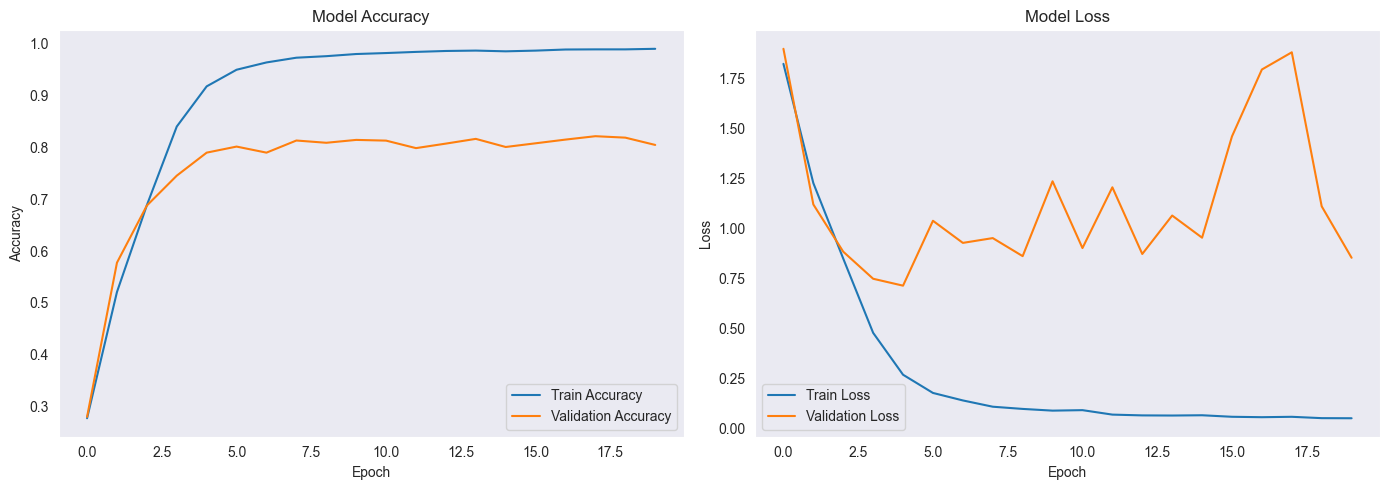

In [67]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


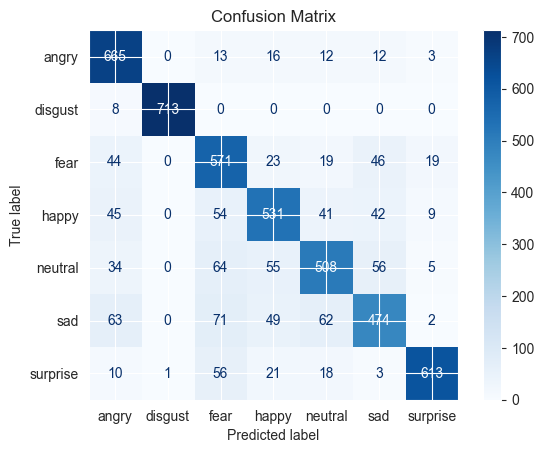

              precision    recall  f1-score   support

       angry       0.77      0.92      0.84       721
     disgust       1.00      0.99      0.99       721
        fear       0.69      0.79      0.74       722
       happy       0.76      0.74      0.75       722
     neutral       0.77      0.70      0.74       722
         sad       0.75      0.66      0.70       721
    surprise       0.94      0.85      0.89       722

    accuracy                           0.81      5051
   macro avg       0.81      0.81      0.81      5051
weighted avg       0.81      0.81      0.81      5051



In [68]:
true_labels = test_gen_sequential.classes
predicted_labels = model.predict(test_gen_sequential)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_sequential.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_sequential.class_indices.keys())
print(report)